In [1]:
import pandas as pd
iris=pd.read_csv("Iris.csv")

In [2]:
iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
Y=iris['Species'].map({'Iris-setosa':0,     #label encoding
                  'Iris-versicolor':1,     #mapping the values
                  'Iris-virginica':2})

In [6]:
#iris['Y']=Y      # separating the properties of dataset
X=iris.drop(['Id','Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.shape

(150, 6)

In [8]:

#Scikit learn
from sklearn.neighbors import KNeighborsClassifier     #
kmodel = KNeighborsClassifier(n_neighbors=5)


In [9]:
#training the model

#in case of tie it will choose the nearest 
#we can also say this is the drawback of this model
#for deciding no of neighbours we have to know the error by validation data
#by taking samples for validation and testing

Y.isnull().sum()
kmodel.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
arr=kmodel.predict([[2.1,1.2,3.2,1.5],[2.1,1.2,1.2,0.5]])   #fxn used for predicitng
for i in arr:
    if i==0:
        print("setosa")
    if i==1:
        print("versi")
    if i==2:
        print("verginia")

versi
setosa


In [11]:
#for dividing data into test and train we will use slicing with help of a library 
#Train_test_split - Divide Data into two parts
#generally  75_25 ratio
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=3)

In [12]:
kmodel.fit(xtrain,ytrain)    #training over train data


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
ypred=kmodel.predict(xtest)   #predicting the values 

In [14]:
ytest==ypred  #comparison between prediction and ytest 

47      True
3       True
31      True
25      True
15      True
118     True
89      True
6       True
103     True
65      True
88      True
38      True
92      True
53      True
140     True
40      True
72     False
135     True
113     True
42      True
126     True
112     True
141     True
76      True
5       True
109     True
134     True
67      True
57      True
86      True
Name: Species, dtype: bool

In [15]:
#finding the accuracy 
(ytest==ypred).sum()/len(xtest)   
kmodel.score(xtest,ytest)

0.9666666666666667

In [16]:
kmodel.predict([[3.1,2.1,1.1,3.4]])   #using dual brackets here for two dimensional data

array([0], dtype=int64)

In [17]:

xtrain.shape

(120, 4)

In [18]:
#checking the accuracy change wrt to no of neighbors
accuracy=[]
for i in range(1,10):
    km=KNeighborsClassifier(n_neighbors=i)
    km.fit(xtrain,ytrain)
    a=km.score(xtest,ytest)
    accuracy.append(a)          #score is used for calculating the accuracy
accuracy

[0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0]

In [19]:
import matplotlib.pyplot as plt
import numpy as np
y_axis=accuracy
x_axis=np.arange(1,10)

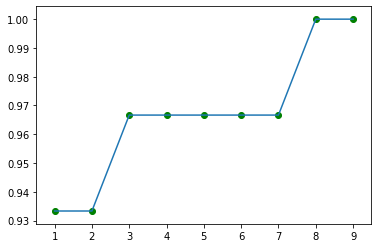

In [20]:
plt.plot(x_axis,y_axis)
plt.scatter(x_axis,y_axis,color='g')
plt.show()

In [21]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [22]:
x1 = X['SepalLengthCm']
x2 = X['SepalWidthCm']
x3 = X['PetalLengthCm']
x4 = X['PetalWidthCm']
yc = Y

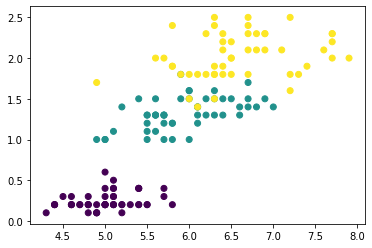

In [23]:
plt.scatter(x1,x4,c=yc)    #visualization technique
plt.show()

In [24]:
#we can even use 2 for creatin algo